In [1]:
#Importing Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split, GridSearchCV

#Importing Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import BernoulliNB

    
#Bagging Algo
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.neural_network import MLPClassifier

#To tranform data
from sklearn import preprocessing

#statistical Tools
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

#Setting Format
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

# Import des données

In [2]:
df = pd.read_csv('C:/Users/Fabien/Documents/table_training.csv', sep = ";")
df.head()


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type_K,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_THS,DELINQUENT_ACCTS_IN_LAST_SIX_THS,AVERAGE_ACCT_AGE_bis,CREDIT_HISTORY_LENGTH_bis,NO_OF_INQUIRIES,loan_default
0,537409,47145,65550,"73,23",67,22807,45,1502,Self employed,6,1998,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,2,2,0,1
1,417566,53278,61360,"89,63",67,22807,45,1497,Self employed,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,624493,57513,66113,"88,48",67,22807,45,1501,Self employed,6,1998,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,1,1
3,539055,52378,60300,"88,39",67,22807,45,1495,Self employed,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,518279,54513,61900,"89,66",67,22807,45,1501,Self employed,6,1998,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,2,2,0,0


In [3]:
#voici nos variables 
print(df.columns.tolist())

['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Employment_Type_K', 'State_ID', 'Employee_code_ID', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_THS', 'DELINQUENT_ACCTS_IN_LAST_SIX_THS', 'AVERAGE_ACCT_AGE_bis', 'CREDIT_HISTORY_LENGTH_bis', 'NO_OF_INQUIRIES', 'loan_default']


In [4]:
#Pour l'exploration de données, il est préférable de les séparer dans des variables différentes, plus simple d'accès par la suite 

numerical=['disbursed_amount','asset_cost','PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT','ltv','DELINQUENT_ACCTS_IN_LAST_SIX_THS','NEW_ACCTS_IN_LAST_SIX_THS']
categorical=[ 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE',
       'NO_OF_INQUIRIES', 'PERFORM_CNS_SCORE_DESCRIPTION','AVERAGE_ACCT_AGE_bis','CREDIT_HISTORY_LENGTH_bis',
       'Employment_Type_K','NO_OF_INQUIRIES']

idvar  = ['UniqueID','supplier_id','manufacturer_id','Current_pincode_ID','State_ID','Employee_code_ID']
target = ['loan_default']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233153 entries, 0 to 233152
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   UniqueID                          233153 non-null  int64 
 1   disbursed_amount                  233153 non-null  int64 
 2   asset_cost                        233153 non-null  int64 
 3   ltv                               233153 non-null  object
 4   branch_id                         233153 non-null  int64 
 5   supplier_id                       233153 non-null  int64 
 6   manufacturer_id                   233153 non-null  int64 
 7   Current_pincode_ID                233153 non-null  int64 
 8   Employment_Type_K                 225492 non-null  object
 9   State_ID                          233153 non-null  int64 
 10  Employee_code_ID                  233153 non-null  int64 
 11  Aadhar_flag                       233153 non-null  int64 
 12  PA

# Exploration des données 

In [6]:
print(f"Dimension du data set est {df.shape}\n")

Dimension du data set est (233153, 38)



## Recherche des éléments null dans notre table 

La première étape dans notre découverte des données sera d'identifier la présence de valeures null dans notre table 

In [7]:
df.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Employment_Type_K                   7661
State_ID                               0
Employee_code_ID                       0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALANCE                    0
PRI_SANCTIONED_AMOUNT                  0
PRI_DISBURSED_AMOUNT                   0
SEC_NO_OF_ACCTS 

['Employment_Type_K'] est la seule variable comportant des éléments null, nous allons regarder de plus près. 

In [8]:
df['Employment_Type_K'].value_counts()

Self employed    127635
Salaried          97857
Name: Employment_Type_K, dtype: int64

La variable Employment_Type_K est composé de deux facteurs 'Self employed' et 'Salaried' il est intéressant de remplacer les NA par une autre catégorie, 'Unemployed' par exemple

In [9]:
df["Employment_Type_K"].fillna(value = "Unemployed",inplace = True)
df['Employment_Type_K'].value_counts()

Self employed    127635
Salaried          97857
Unemployed         7661
Name: Employment_Type_K, dtype: int64

In [10]:
## Traitement des types de données 

# On transforme les variables numériques en catégories                                                                                                                                                                             
#df['branch_id'] = df['branch_id'].astype('category')
#df['manufacturer_id'] = df['manufacturer_id'].astype('category')
#df['State_ID'] = df['State_ID'].astype('category')
#df['NEW_ACCTS_IN_LAST_SIX_THS'] = df['NEW_ACCTS_IN_LAST_SIX_THS'].astype('category')
#df['DELINQUENT_ACCTS_IN_LAST_SIX_THS'] = df['DELINQUENT_ACCTS_IN_LAST_SIX_THS'].astype('category') 
#df['NO_OF_INQUIRIES'] = df['NO_OF_INQUIRIES'].astype('category')
#df['loan_default'] = df['loan_default'].astype('category')
#df['Employment_Type_K'] = df['Employment_Type_K'].astype('category')
#df['Aadhar_flag'] = df['Aadhar_flag'].astype('category')
#df['PAN_flag'] = df['PAN_flag'].astype('category')
#df['Passport_flag'] = df['Passport_flag'].astype('category')
#df['VoterID_flag'] = df['VoterID_flag'].astype('category')
#df['Driving_flag'] = df['Driving_flag'].astype('category')


#traitement de ltv, considéré comme string alors que c'est un float 
df['ltv'] = df['ltv'].str.replace(',','.').astype('float64')


## Stats 

On peut commencer par regarder les statistiques de base de notre table. Cependant beaucoup d'informations ne sont pas utiles ici car .describe() effectue des opérations sur des variables catégorielles ce qui n'a pas de sens.


In [11]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_THS,DELINQUENT_ACCTS_IN_LAST_SIX_THS,AVERAGE_ACCT_AGE_bis,CREDIT_HISTORY_LENGTH_bis,NO_OF_INQUIRIES,loan_default
count,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000,233153.00000
mean,535918.06701,54357.00974,75865.14305,74.74647,72.93612,19638.62145,69.02816,3396.88864,7.26225,1549.47522,0.84032,0.07558,0.14494,0.02324,0.00213,289.46424,2.44065,1.03990,0.15655,165900.78849,218504.79249,218066.83395,0.05908,0.02770,0.00724,5427.81610,7295.95464,7180.02867,13105.53793,323.26984,0.38184,0.09748,0.76421,1.37857,0.20662,0.21707
std,68315.42439,12971.33963,18944.78739,11.45662,69.83514,3491.95089,22.14130,2238.14864,4.48224,975.26293,0.36631,0.26432,0.35204,0.15067,0.04607,338.37497,5.21724,1.94150,0.54879,942275.54044,2374799.17545,2377748.90238,0.62680,0.31606,0.11108,170237.35934,183156.38523,182592.89104,151368.22689,15553.72468,0.95511,0.38444,1.29160,2.40194,0.70650,0.41225
min,417428.00000,13320.00000,37000.00000,10.03000,1.00000,10524.00000,45.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-6678296.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-574647.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,476787.00000,47145.00000,65717.00000,68.88000,14.00000,16535.00000,48.00000,1511.00000,4.00000,713.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,535979.00000,53803.00000,70946.00000,76.80000,61.00000,20333.00000,86.00000,2970.00000,6.00000,1451.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,595040.00000,60413.00000,79202.00000,83.67000,130.00000,23000.00000,86.00000,5677.00000,10.00000,2362.00000,1.00000,0.00000,0.00000,0.00000,0.00000,678.00000,3.00000,1.00000,0.00000,35008.00000,62500.00000,60800.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1999.00000,0.00000,0.00000,0.00000,1.00000,2.00000,0.00000,0.00000
max,671084.00000,990572.00000,1628992.00000,95.00000,261.00000,24803.00000,156.00000,7345.00000,22.00000,3795.00000,1.00000,1.00000,1.00000,1.00000,1.00000,890.00000,453.00000,144.00000,25.00000,96524920.00000,1000000000.00000,1000000000.00000,52.00000,36.00000,8.00000,36032852.00000,30000000.00000,30000000.00000,25642806.00000,4170901.00000,35.00000,20.00000,31.00000,39.00000,36.00000,1.00000


## T test de Student

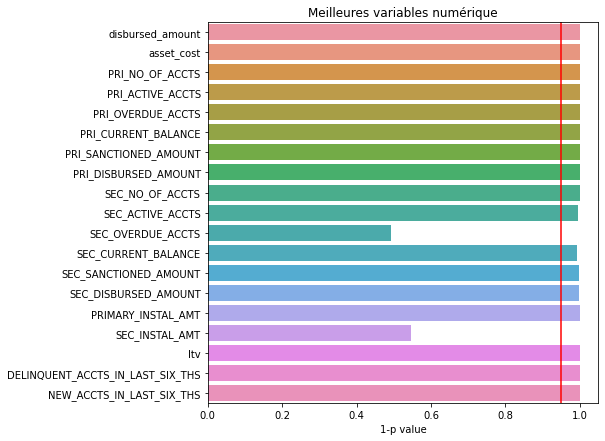

In [12]:
p=[]
from scipy.stats import ttest_ind

for i in numerical:
    df1=df.groupby('loan_default').get_group(0)
    df2=df.groupby('loan_default').get_group(1)
    t,pvalue=ttest_ind(df1[i],df2[i])
    p.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=p, y=numerical)
plt.title('Meilleures variables numérique')
plt.axvline(x=(1-0.05),color='r')
plt.xlabel('1-p value')
plt.show()

L'un des premiers tests que l'on peut effectuer sur notre table est le T test de Student, il nous permet de vérifier l'hypothèse d'indépendance des variables. Nous pouvons utiliser toutes les variables qui dépassent le trait rouge dans notre graphique. Cependant il faut poser le contexte, les variables ne dépassant pas le trait rouge sont des informations appartenant au co-emprunteur. Ces informations sont essentielles lors d'un prêt, il faut donc les garder, nous les aggrégerons aux informations de l'emprunteur si nécessaire. 

## Anova test

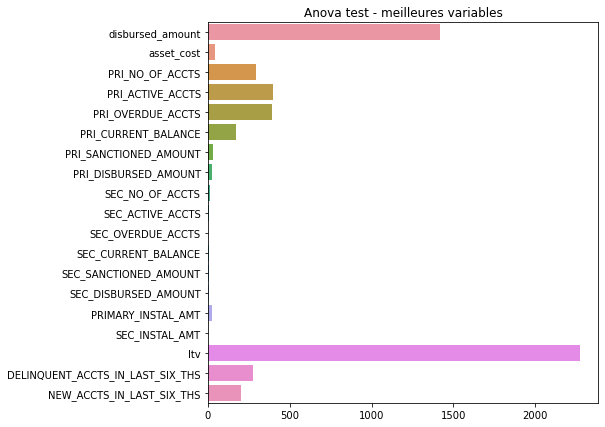

In [13]:
from sklearn.feature_selection import SelectKBest,f_classif
n = SelectKBest(score_func=f_classif, k=10)
numcols=n.fit(df[numerical],df['loan_default'])
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=numerical)
plt.title('Anova test - meilleures variables')
plt.show()

Le T test n'étant pas toujours suffisant car il ne prends pas en compte la variance des éléments, on peut le compléter avec un test Anova, nous tirons les mêmes conclusions que pour le T test, les informations du co-emprunteur semblent être peu utilisable mais nous devons les garder.

### Regroupement des informations de l'emprunteur et du co-emprunteur 

In [14]:
df.loc[:,'Nb_of_loans_active'] = df['PRI_NO_OF_ACCTS'] + df['SEC_NO_OF_ACCTS']
df.loc[:,'Total_Inactive_accounts'] = df['PRI_NO_OF_ACCTS'] + df['SEC_NO_OF_ACCTS']
df.loc[:,'Total_Overdue_Accounts'] = df['PRI_OVERDUE_ACCTS'] + df['SEC_OVERDUE_ACCTS']
df.loc[:,'Total_Current_Balance'] = df['PRI_CURRENT_BALANCE'] + df['SEC_CURRENT_BALANCE']
df.loc[:,'Total_Sanctioned_Amount'] = df['PRI_SANCTIONED_AMOUNT'] + df['SEC_SANCTIONED_AMOUNT']
df.loc[:,'Total_Disbursed_Amount'] = df['PRI_DISBURSED_AMOUNT'] + df['SEC_DISBURSED_AMOUNT']
df.loc[:,'Total_Installment'] = df['PRIMARY_INSTAL_AMT'] + df['SEC_INSTAL_AMT']

## CHI ² test pour les variables catégorielles 

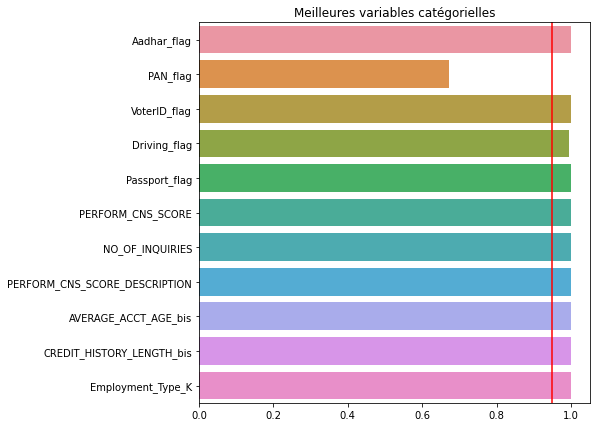

In [15]:

from scipy.stats import chi2_contingency
l=[]
for i in categorical:
    pvalue  = chi2_contingency(pd.crosstab(df['loan_default'],df[i]))[1]
    l.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=l, y=categorical)
plt.title('Meilleures variables catégorielles')
plt.axvline(x=(1-0.05),color='r')
plt.show()

Nous utilisons pour les variables catégorielles le test Chi2, ici encore les variables dépassant le trait rouge permettent de conclure à une dépendance des variables avec notre variable cible ['loan_default']. La seule variable qui ne réussit pas le test est ['PAN_flag'] mais c'est expliqué par le contexte. En effet, ['PAN_flag'] est une carte d'identité, elle est obligatoire lors de la demande de prêt. 

## Traitement des données inutiles 

On retire les variables que nous n'utiliserons pas. 

In [16]:
df=df.drop(['PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS','PRI_CURRENT_BALANCE',
            'PRI_SANCTIONED_AMOUNT','SEC_NO_OF_ACCTS','PRI_NO_OF_ACCTS','PRI_DISBURSED_AMOUNT','PRI_ACTIVE_ACCTS', 
            'PRI_OVERDUE_ACCTS','SEC_CURRENT_BALANCE','SEC_SANCTIONED_AMOUNT', 'SEC_OVERDUE_ACCTS',
            'SEC_DISBURSED_AMOUNT','PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT','disbursed_amount','SEC_ACTIVE_ACCTS'],axis=1)

df=df.drop(idvar,axis=1)

In [17]:
df.shape

(233153, 24)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233153 entries, 0 to 233152
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   asset_cost                        233153 non-null  int64  
 1   ltv                               233153 non-null  float64
 2   branch_id                         233153 non-null  int64  
 3   Employment_Type_K                 233153 non-null  object 
 4   Aadhar_flag                       233153 non-null  int64  
 5   PAN_flag                          233153 non-null  int64  
 6   VoterID_flag                      233153 non-null  int64  
 7   Driving_flag                      233153 non-null  int64  
 8   Passport_flag                     233153 non-null  int64  
 9   PERFORM_CNS_SCORE                 233153 non-null  int64  
 10  PERFORM_CNS_SCORE_DESCRIPTION     233153 non-null  object 
 11  NEW_ACCTS_IN_LAST_SIX_THS         233153 non-null  i

In [19]:
# on recode ensuite ['PERFORM_CNS_SCORE_DESCRIPTION']

#Regroupement des modalités en 6 classes 
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('No Bureau History Available', 1)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: Sufficient History Not Available',1)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer',1)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',1)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: No Updates available in last 36 ths',1)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: Only a Guarantor', 1)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',1)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('M-Very High Risk', 6)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('L-Very High Risk', 6)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('K-High Risk', 5)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('J-High Risk', 5)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('I-Medium Risk', 4)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('H-Medium Risk', 4)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('G-Low Risk', 3)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('F-Low Risk', 3)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('E-Low Risk', 3)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('D-Very Low Risk', 2)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('C-Very Low Risk', 2)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('B-Very Low Risk', 2)
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace('A-Very Low Risk', 2)


#on compte le nombre de valeurs par modalités 
df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()
df=df.drop(['PERFORM_CNS_SCORE'] ,axis=1 )


On assigne une valeur numérique à chaque facteur de ['PERFORM_CNS_SCORE_DESCRIPTION'] pour discrétiser ['PERFORM_CNS_SCORE']

In [20]:
df['Employment_Type_K'] = df['Employment_Type_K'].replace('Self employed', 1)
df['Employment_Type_K'] = df['Employment_Type_K'].replace('Salaried', 2)
df['Employment_Type_K'] = df['Employment_Type_K'].replace('Unemployed', 3)

On fait de même pour le type d'emploi, cette étape nous permet d'éviter la création de "dummies" pour le modèle. 

# Analyse descriptive 
## Analyse univariée 

Nous allons parcourir chaque variable 

<AxesSubplot:xlabel='loan_default', ylabel='count'>

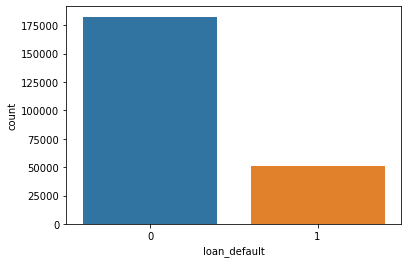

In [21]:
sns.countplot(df['loan_default'])

Notre variable cible possède une bonne distribution, une distribution égale des paiements en '1' et des paiements en '0' ou même pire, avoir plus de '1' auraient compliqués les traitements. 

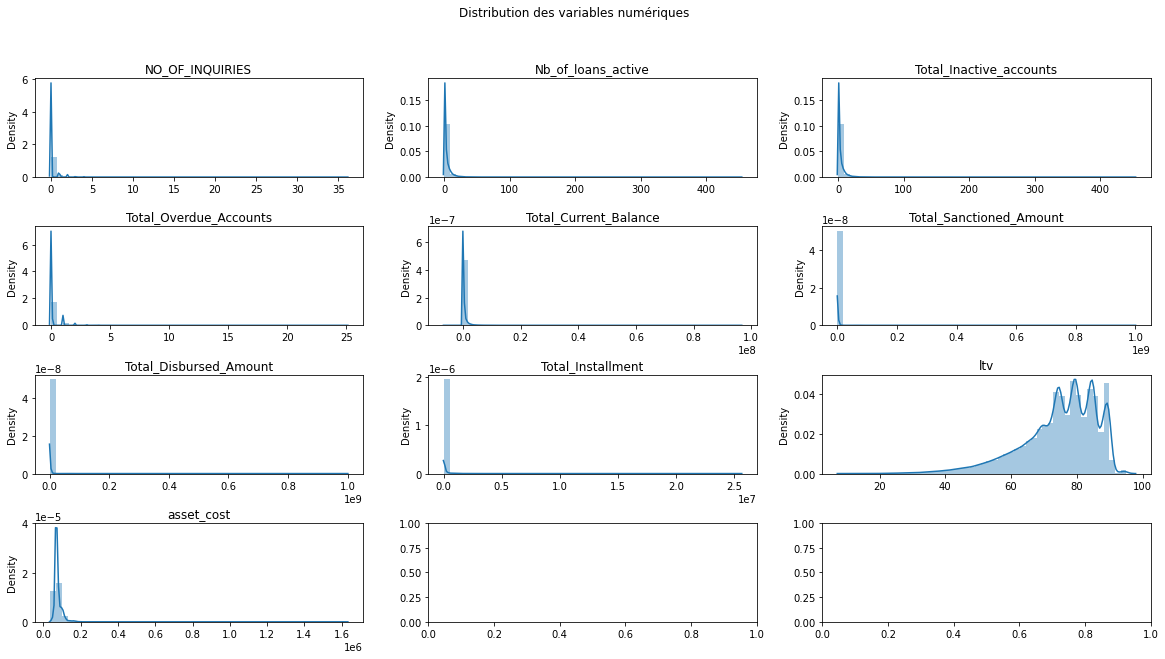

In [22]:
n=['NO_OF_INQUIRIES','Nb_of_loans_active', 'Total_Inactive_accounts',
       'Total_Overdue_Accounts', 'Total_Current_Balance', 'Total_Sanctioned_Amount',
       'Total_Disbursed_Amount', 'Total_Installment','ltv','asset_cost']
data=df[n]
fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution des variables numériques')

for ax, feature, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.distplot(feature, ax=ax)
    ax.set(title=str(name))
plt.show()

Il semblerait que nos données quantitatives contiennent des valeurs extrêmes voir aberrantes qui peuvent perturber la performance du modèle, nous allons essayer des les afficher. 

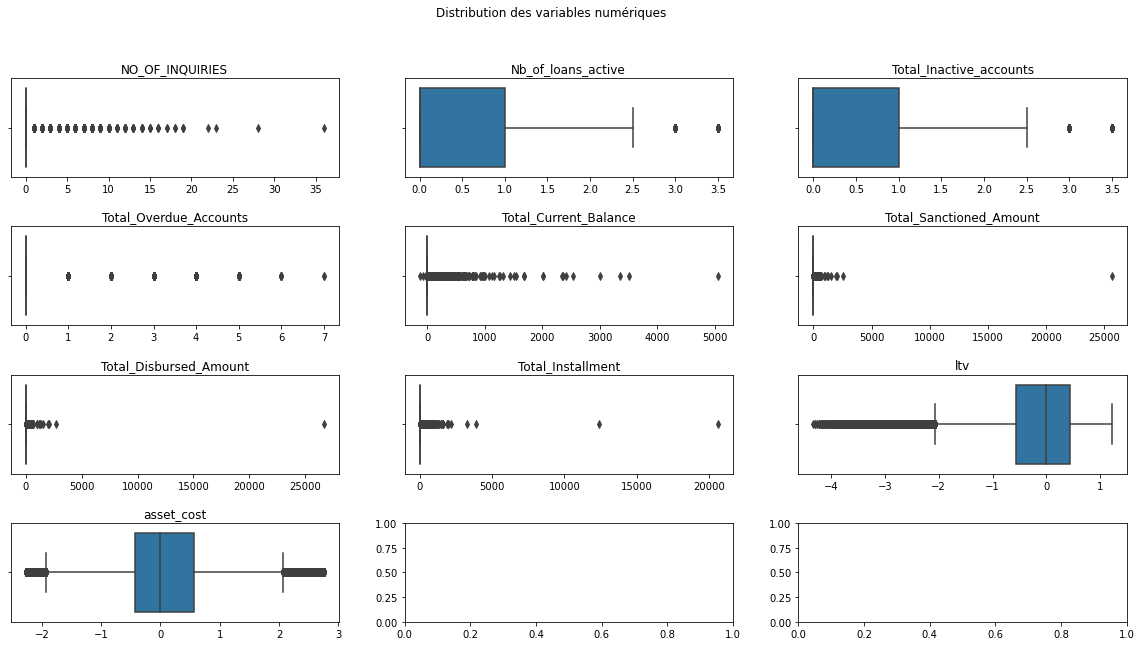

In [56]:
n=['NO_OF_INQUIRIES','Nb_of_loans_active', 'Total_Inactive_accounts',
       'Total_Overdue_Accounts', 'Total_Current_Balance', 'Total_Sanctioned_Amount',
       'Total_Disbursed_Amount', 'Total_Installment','ltv','asset_cost']
data=df[n]
fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution des variables numériques')

for ax, feature, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.boxplot(feature, ax=ax)
    ax.set(title=str(name))
plt.show()

Les variables semblent être surtout composées de 0, il est difficile de savoir comment les traiter sans les règles métiers, il serait peut-être intéressant de les transformer en flag 0-1 de sorte à pouvoir identifier si le client possède des antécédents bancaires négatifs(total_sanctioned_amount, total_overdue_accounts) mais je n'arrive pas à faire fonctionner le code en les transformant... je ne vais donc pas les changer. 

De plus le fait qu'on retrouve beaucoup de 0 traduit la situation d'un premier prêt car le client n'a pas d'informations à donner. 

Avant de procéder à des étapes de standardisation telle que IQR * 1,5 il faut remettre les données dans leur contexte une fois de plus. Il n'y aurait pas de sens à standardiser les valeurs extrêmes de 'ltv' par exemple, en effet ltv représente le rapport entre le prix du prêt et l'apport, il est normale qu'il soit aussi dispersé. 



In [24]:
#On supprime les valeurs aberrantes de disbursed amount 
#On calcule Q1

q1=df["Total_Inactive_accounts"].quantile(q=0.25)

#On calcule Q3

q3=df["Total_Inactive_accounts"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

df= df[df["Total_Inactive_accounts"]<borne_sup]
df=df[df["Total_Inactive_accounts"]>borne_inf]

In [25]:
#On supprime les valeurs aberrantes de disbursed amount 
#On calcule Q1

q1=df["asset_cost"].quantile(q=0.25)

#On calcule Q3

q3=df["asset_cost"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

df= df[df["asset_cost"]<borne_sup]
df=df[df["asset_cost"]>borne_inf]

In [ ]:
#On supprime les valeurs aberrantes de disbursed amount 
#On calcule Q1

q1=df["Total_Disbursed_Amount"].quantile(q=0.25)

#On calcule Q3

q3=df["Total_Disbursed_Amount"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

df= df[df["Total_Disbursed_Amount"]<borne_sup]
df=df[df["Total_Disbursed_Amount"]>borne_inf]

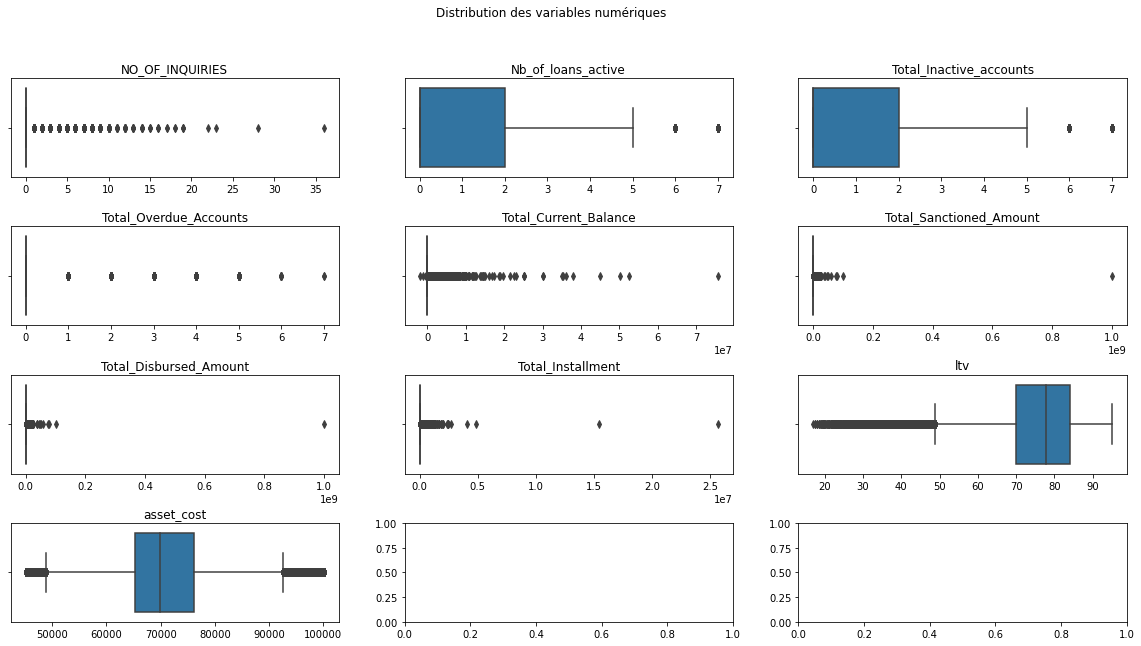

In [26]:
n=['NO_OF_INQUIRIES','Nb_of_loans_active', 'Total_Inactive_accounts',
       'Total_Overdue_Accounts', 'Total_Current_Balance', 'Total_Sanctioned_Amount',
       'Total_Disbursed_Amount', 'Total_Installment','ltv','asset_cost']
data=df[n]
fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution des variables numériques')

for ax, feature, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.boxplot(feature, ax=ax)
    ax.set(title=str(name))
plt.show()

On voit que malgré la standardisation de 'Total_disbursed_amount', il reste beaucoup de 0, sûrement parce que les clients n'ont pas eu de prêt auparavant

In [27]:
#df['flag_Sanctioned_Amount'] = df['Total_Sanctioned_Amount']>1  

In [28]:
# création de flag mais ça marche pas 
#df['flag_Sanctioned_Amount'] = np.where(df['Total_Sanctioned_Amount'] >= 1, 'yes', 'no')
#df['flag_Sanctioned_Amount'] = df['flag_Sanctioned_Amount'].replace('yes', 1)
#df['flag_Sanctioned_Amount'] = df['flag_Sanctioned_Amount'].replace('no', 0)


In [29]:

#sns.boxplot(x = df['flag_Sanctioned_Amount'], 
           # y= df['loan_default'])

In [30]:
#sns.countplot(df['flag_Sanctioned_Amount'])

##  Analyse bivariée 

Dans cette partie, à l'aide de graphique nous allons essayer de chercher les variables ayant un potentiel lien avec notre variable cible 'loan_default'

In [ ]:
data = df.copy()

#data[feature].hist(bins=25)

sns.histplot(data=df, x='Total_Disbursed_Amount', hue='loan_default')

plt.xlabel(feature)

plt.ylabel("Count")

plt.title(feature)

plt.show()


<AxesSubplot:xlabel='Total_Disbursed_Amount', ylabel='loan_default'>

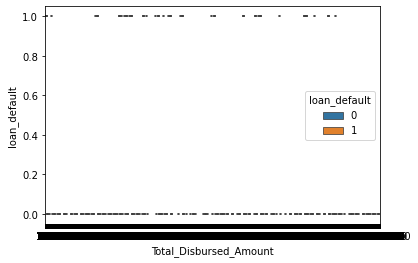

In [32]:

sns.boxplot(x = df['Total_Disbursed_Amount'], 
            y= df['loan_default'],
           hue=df['loan_default'])

problème avec les graphs à revoir ça faisait pas ça avant

# Modélisation 
## Régression logistique 

In [33]:
y = df['loan_default']
X = df.drop('loan_default',axis=1)

In [34]:
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss,roc_curve,accuracy_score


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

In [37]:
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [38]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_train_prob = lr.predict_proba(X_train)
y_test_prob = lr.predict_proba(X_test)

In [39]:
print('train AUC score:',roc_auc_score(y_train,y_train_prob[:,1]))
print('test AUC score:',roc_auc_score(y_test,y_test_prob[:,1]))

train AUC score: 0.49856745013314246
test AUC score: 0.4999708380516953


on a un probleme AUC catastrophique 

# méthode  2

In [66]:
nums=['asset_cost', 'ltv',
       'NEW_ACCTS_IN_LAST_SIX_THS', 'DELINQUENT_ACCTS_IN_LAST_SIX_THS',
       'AVERAGE_ACCT_AGE_bis', 'CREDIT_HISTORY_LENGTH_bis', 'NO_OF_INQUIRIES','Nb_of_loans_active', 'Total_Inactive_accounts',
       'Total_Overdue_Accounts', 'Total_Current_Balance', 'Total_Sanctioned_Amount',
       'Total_Disbursed_Amount', 'Total_Installment']

In [67]:
from sklearn.preprocessing import  RobustScaler
rob_scaler = RobustScaler()

df[nums] = rob_scaler.fit_transform(df[nums])

In [42]:
#metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

y=df.loan_default
X=df.drop("loan_default",axis=1)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('train accuracy :',lr.score(X_train,y_train))
print('test accuracy :',lr.score(X_test,y_test))
print("precision :",precision_score(y_test,y_pred),"\n")
print("recall :",recall_score(y_test,y_pred),"\n")
print("f1 score:",f1_score(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred))

train accuracy : 0.7788036538650427
test accuracy : 0.7823281561271442
precision : 0.4596774193548387 

recall : 0.004620248034368161 

f1 score: 0.009148543455581413 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     44386
           1       0.46      0.00      0.01     12337

    accuracy                           0.78     56723
   macro avg       0.62      0.50      0.44     56723
weighted avg       0.71      0.78      0.69     56723



In [43]:
from sklearn.ensemble import RandomForestClassifier

rsearch1_best_params = {'max_depth': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 11,
 'n_estimators': 374}
rfc1 = RandomForestClassifier(**rsearch1_best_params, random_state=300)
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=11,
                       n_estimators=374, random_state=300)

In [44]:
y_train_pred = rfc1.predict(X_train)
y_test_pred = rfc1.predict(X_test)
y_train_prob = rfc1.predict_proba(X_train)
y_test_prob = rfc1.predict_proba(X_test)

In [45]:
print('Train AUC score:', roc_auc_score(y_train,y_train_prob[:,1]))
print('Test AUC score:', roc_auc_score(y_test,y_test_prob[:,1]))

Train AUC score: 0.7234584938709789
Test AUC score: 0.6389878332383676


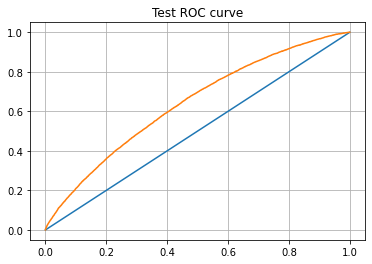

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [47]:
confusion_matrix(y_test, y_test_pred)

array([[44365,    21],
       [12266,    71]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     44386
           1       0.77      0.01      0.01     12337

    accuracy                           0.78     56723
   macro avg       0.78      0.50      0.44     56723
weighted avg       0.78      0.78      0.69     56723

